## 1.2.3. Marker genes

In this notebook we will explore some list of marker genes for different cell types. This will help us to get a better understanding of which cell types are present in our dataset. Two of the lists of marker genes that we are using have been compiled by Yasmin Demerdash (PhD student in the lab of Marieke Essers) and Florian Grünschlager (PhD student in the lab of Simon Haas). Both lists are unpublished, but based on careful literature review. The lists can be found in the "data/gene_lists" folder (celltype_marker_genes_Yasmin.csv and celltype_marker_genes_Florian.csv). Additionally we are using the marker genes from Baccin et al. 2019 (https://doi.org/10.1038/s41556-019-0439-6). You can find there gene markers on the second tab of the Supplementary Table excel file. In the folder "data/gene_lists" you can find a csv file with those same gene markers (celltype_marker_genes_Baccin.csv).  

PS: perhaps it is a bit confusing that the cell types are already assigned to the clusters in notebook 1.1, and we look at the marker genes only afterwards. In reality, we looked at the marker genes (and the other indicators found in notebook 1.2.1 - 1.2.5) before assigning cell types to the clusters. However, we felt that the pipeline would make more sense in this order, because you can run notebook 1.1 and get the complete single cell object (.h5ad file), without the need for running notebooks 1.2.1-1.2.5 first.

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization
import os #for getting the paths to the gene lists

# import own functions
from plotting import *

### Load data

Here, we load the filtered control subset (as filtered in notebook 1.1).

In [2]:
### load Anndata object with the control subset 
adata_path = "../data/count_matrices/control_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [4]:
### scale dataset
sc.pp.scale(adata)

In [5]:
### load lists with marker_genes
set_names = ["genes_Baccin", "genes_Yasmin", "genes_Florian"]

marker_genes_sets = {}

for set_name in set_names:
    marker_genes_path = "../data/gene_lists/celltype_marker_"+set_name+".csv"
    marker_genes = pd.read_csv(marker_genes_path, sep=";")
    marker_genes_sets[set_name] = marker_genes

### Score cells for marker genes
Here, we will score each cell using the different sets of marker genes. We use the Scanpy built-in tool "score_genes" to score each gene for the average expression of the set of genes belonging to one cell type. For more information see: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.score_genes.html. If there are 5 cell types in one set of marker genes, that means that 5 scores are assigned to each cell for this set. The function `plot_genesets` scores for the gene set and plots a UMAP and dotplot visualzing the scores.  

### Plot marker genes

Here we will plot a set of UMAPs with in each UMAP the score for all cells for one particular cell type in that set.

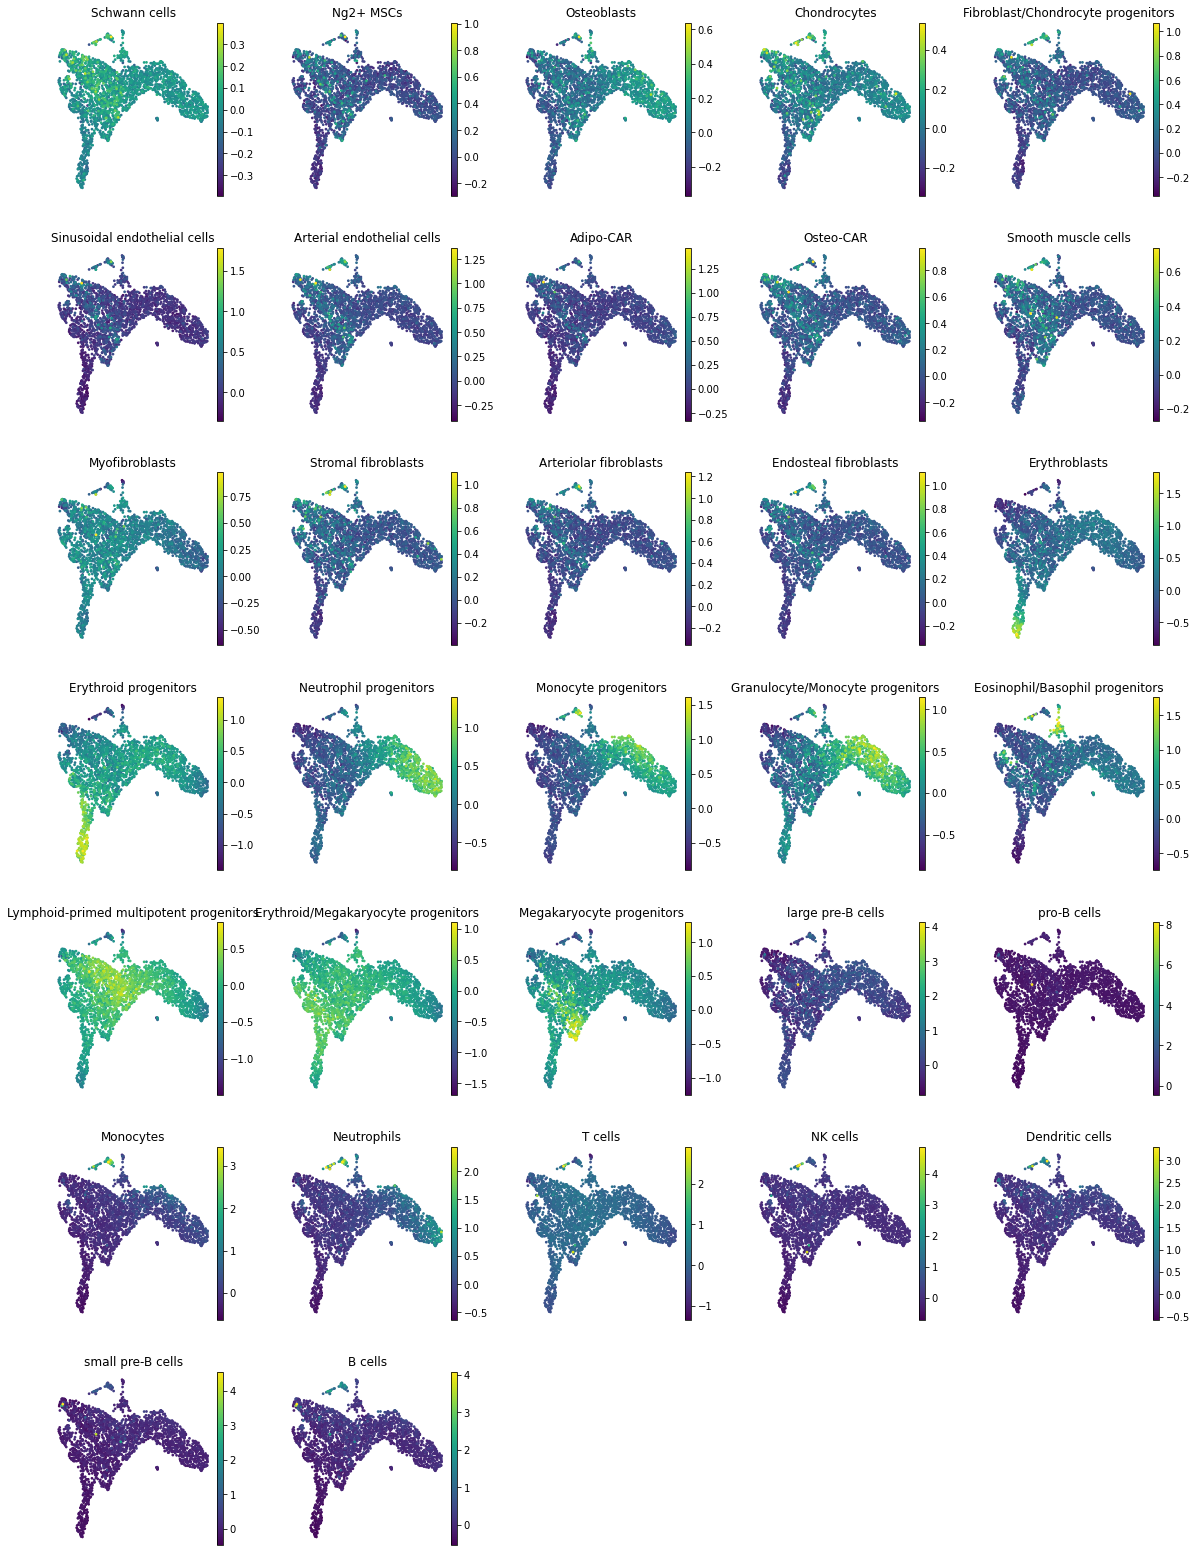

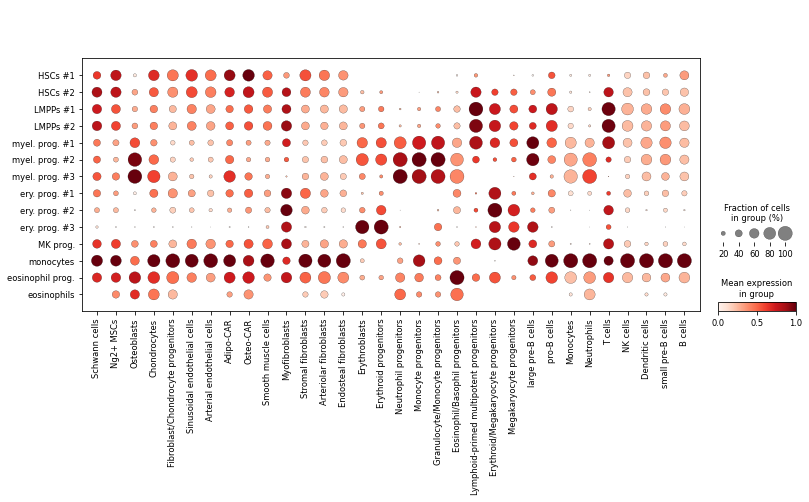

In [6]:
plot_genesets(
    adata, marker_genes_sets["genes_Baccin"],
    save_path = "../figures/1.2.3.dotplot_celltype_marker_genes_Baccin.png",
    save=False, plot="both"
)

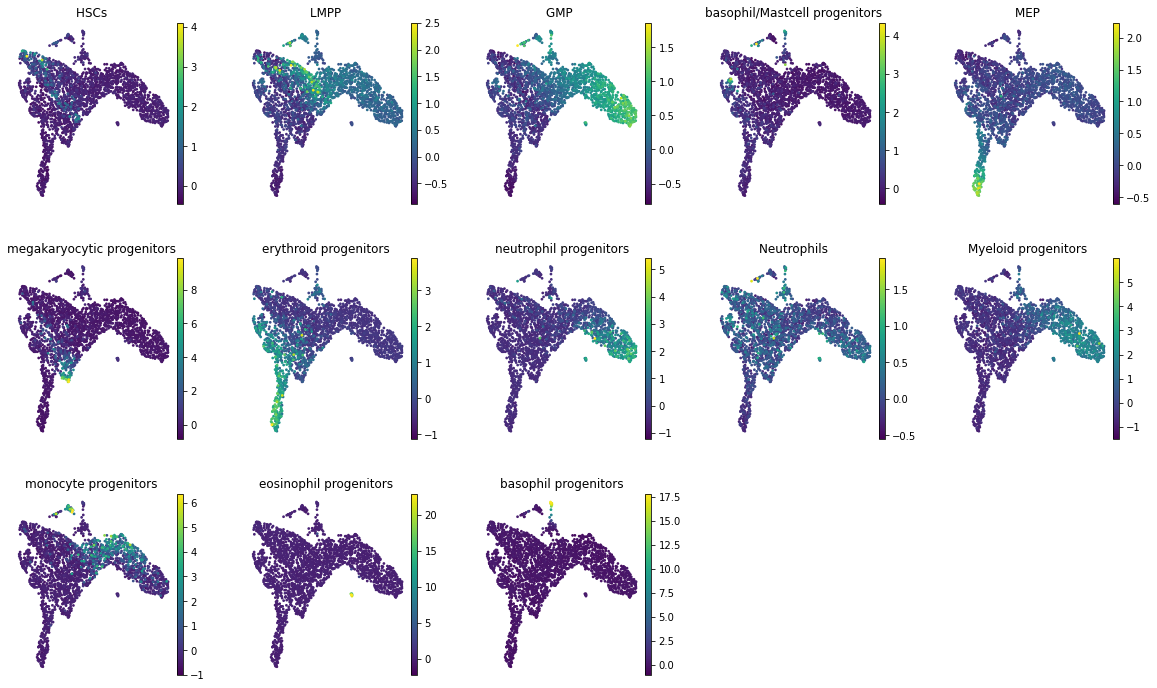

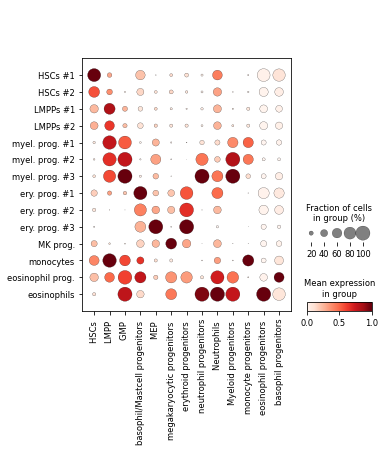

In [7]:
plot_genesets(
    adata, marker_genes_sets["genes_Yasmin"],
    save_path = "../figures/1.2.3.dotplot_celltype_marker_genes_Yasmin.png",
    save=False, plot="both"
)

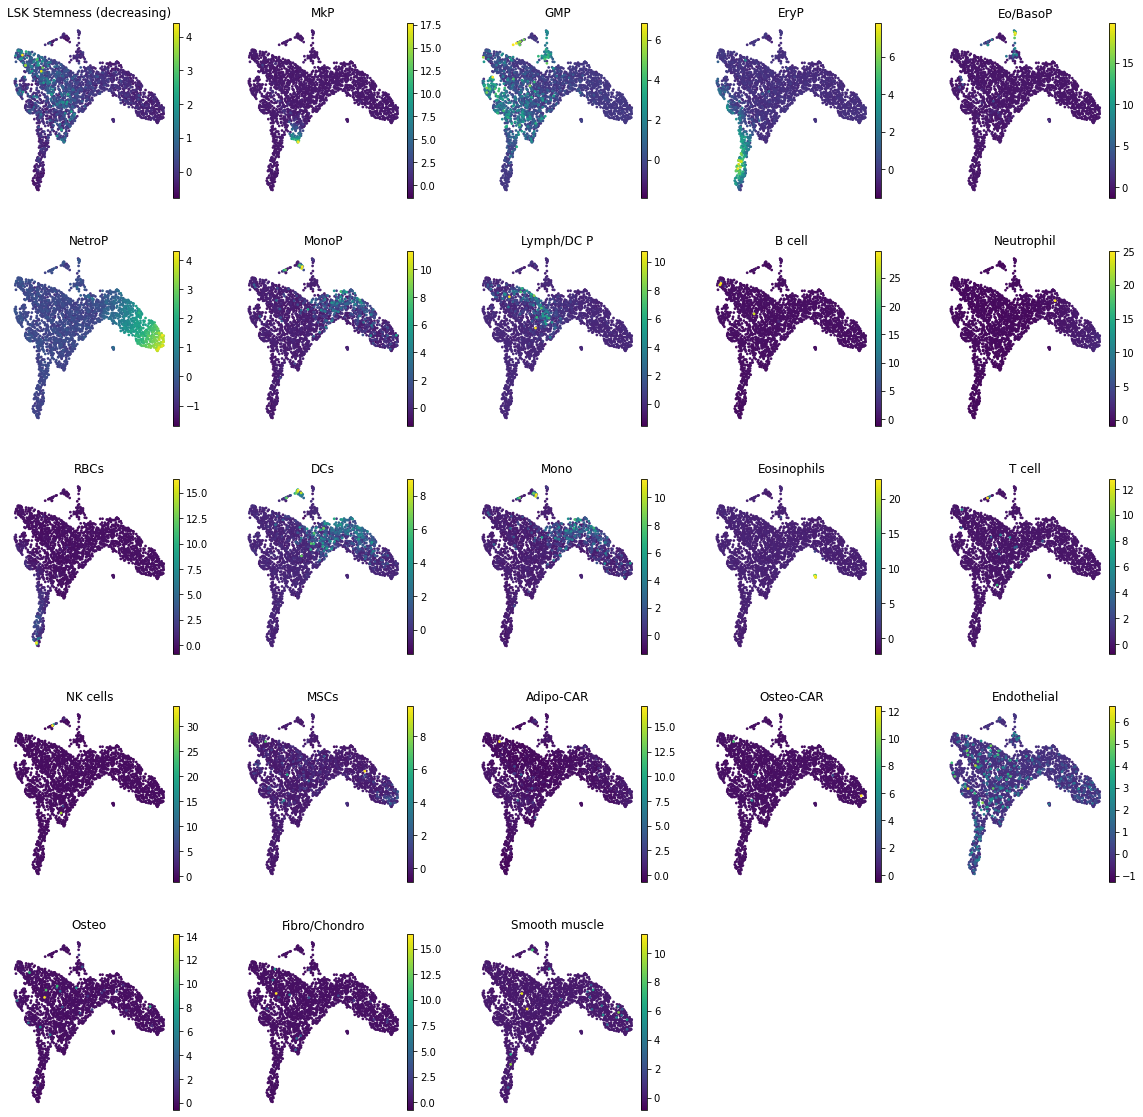

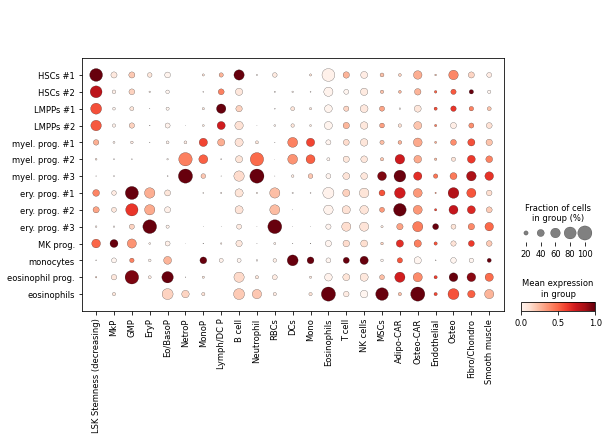

In [8]:
plot_genesets(
    adata, marker_genes_sets["genes_Florian"],
    save_path = "../figures/1.2.3.dotplot_celltype_marker_genes_Florian.png",
    save=False, plot="both"
)